In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

([<matplotlib.axis.YTick at 0x25839cba650>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 14, '14'),
  Text(0, 16, '16'),
  Text(0, 18, '18')])

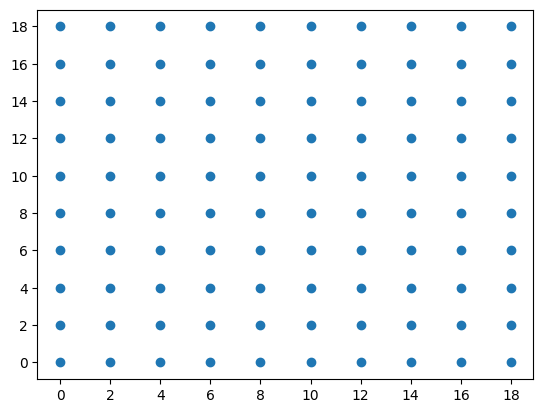

In [21]:
# Mesh
xc = np.arange(0,20,2)
yc = np.arange(0,20,2)
xc,yc = np.meshgrid(xc,yc)

plt.scatter(xc,yc)
plt.xticks(np.arange(0,20,2)) 
plt.yticks(np.arange(0,20,2)) 

In [5]:
n = input('Enter number of vehicles:' )
n = int(n)
coors = []
for i in range(n):
    c = input(f'Enter Coordinate for Car {i+1}:' )
    coors.append(c)
V = [list(map(int, pair.split(','))) for pair in coors]

n = input('Enter number of vehicles:' )
n = int(n)
coors = []
for i in range(n):
    c = input(f'Enter Coordinate for Delivery {i+1}:' )
    coors.append(c)
D = [list(map(int, pair.split(','))) for pair in coors]


In [11]:
def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    steep = dy > dx

    if steep:
        x0, y0 = y0, x0
        x1, y1 = y1, x1

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    dx = x1 - x0
    dy = abs(y1 - y0)
    error = dx / 2
    y_step = 1 if y0 < y1 else -1

    y = y0
    points = []

    for x in range(x0, x1 + 1):
        coord = (y, x) if steep else (x, y)
        points.append(coord)
        error -= dy
        if error < 0:
            y += y_step
            error += dx

    return points

# Example points
start_point = (1, 1)
end_point = (7, 4)

# Compute the direct path
direct_path = bresenham_line(start_point[0], start_point[1], end_point[0], end_point[1])

direct_path = np.array(direct_path)


In [8]:
def is_valid(x, y, grid):
    # Check if the given position (x, y) is within the grid boundaries
    return 0 <= x < len(grid) and 0 <= y < len(grid[0])

def dfs_paths(grid, start, end, path=[]):
    x, y = start
    path = path + [(x, y)]

    if start == end:
        return [path]

    paths = []

    for neighbor in [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]:
        nx, ny = neighbor
        if is_valid(nx, ny, grid) and neighbor not in path:
            new_paths = dfs_paths(grid, neighbor, end, path)
            paths.extend(new_paths)

    return paths

# Example mesh grid (0 represents an open cell, 1 represents an obstacle)
grid = np.zeros((5, 5), dtype=int)

start_point = (2, 2)
end_point = (4, 4)

paths = dfs_paths(grid, start_point, end_point)